Epoch 1/3000
1/1 [==============================] - ETA: 0s - loss: 0.3644
Epoch 1: val_loss improved from inf to 0.34622, saving model to hl5_0100.h5
1/1 [==============================] - 2s 2s/step - loss: 0.3644 - val_loss: 0.3462
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 0.3597
Epoch 2: val_loss improved from 0.34622 to 0.34187, saving model to hl5_0100.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.3597 - val_loss: 0.3419


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/3000
1/1 [==============================] - ETA: 0s - loss: 0.3551
Epoch 3: val_loss improved from 0.34187 to 0.33759, saving model to hl5_0100.h5
1/1 [==============================] - 0s 190ms/step - loss: 0.3551 - val_loss: 0.3376
Epoch 4/3000
1/1 [==============================] - ETA: 0s - loss: 0.3505
Epoch 4: val_loss improved from 0.33759 to 0.33336, saving model to hl5_0100.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.3505 - val_loss: 0.3334
Epoch 5/3000
1/1 [==============================] - ETA: 0s - loss: 0.3459
Epoch 5: val_loss improved from 0.33336 to 0.32919, saving model to hl5_0100.h5
1/1 [==============================] - 0s 189ms/step - loss: 0.3459 - val_loss: 0.3292
Epoch 6/3000
1/1 [==============================] - ETA: 0s - loss: 0.3415
Epoch 6: val_loss improved from 0.32919 to 0.32508, saving model to hl5_0100.h5
1/1 [==============================] - 0s 160ms/step - loss: 0.3415 - val_loss: 0.3251
Epoch 7/3000
1/1 [==============

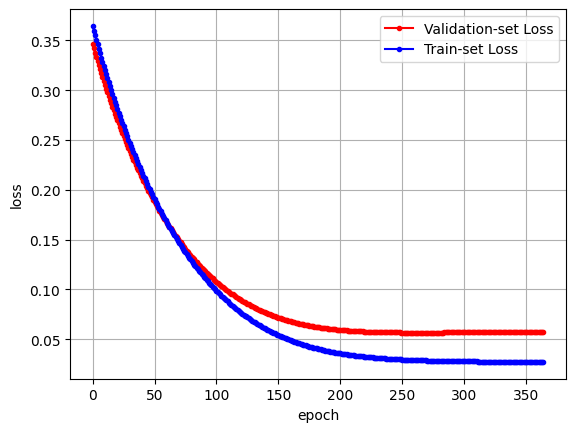

In [1]:
import scipy
import numpy
import h5py

#import tensorflow
from tensorflow import keras

#print('scipy ' + scipy.__version__)
#print('numpy ' + numpy.__version__)
#print('h5py ' + h5py.__version__)

#print('tensorflow ' + tensorflow.__version__)
#print('keras ' + keras.__version__)

import scipy.io

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.datasets import cifar10
#error발생: from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


train_x_data = scipy.io.loadmat('ml_detect_in_train.mat')
train_y_data = scipy.io.loadmat('ml_detect_out_train.mat')

train_x = train_x_data['in']
train_y = train_y_data['out']



val_x_data = scipy.io.loadmat('ml_detect_in_val.mat')
val_y_data = scipy.io.loadmat('ml_detect_out_val.mat')

val_x = val_x_data['in']
val_y = val_y_data['out']


# relu, tanh, elu, selu

model = Sequential()
model.add(Dense(units=100, input_dim=40, activation="elu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="elu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="elu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="elu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="elu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=4, activation="linear", kernel_initializer='normal'))


#model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='mean_squared_error', optimizer='adamax')
#model.compile(loss='mean_squared_error', optimizer='nadam')
#model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.compile(loss='mean_squared_error', optimizer='sgd')

#model.fit(train_x, train_y, epochs=1000, batch_size=32)

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(patience = 100) # 조기종료 콜백함수 정의, 100 에포크 동안은 기다림
checkpoint_callback = ModelCheckpoint('hl5_0100.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(train_x, train_y, epochs=3000, batch_size=32, validation_data=(val_x, val_y), callbacks=[early_stopping, checkpoint_callback])


from keras.models import load_model
model_cp = load_model('hl5_0100.h5')

test_x_data = scipy.io.loadmat('ml_detect_in_test.mat')
test_y_data = scipy.io.loadmat('ml_detect_out_test.mat')
test_x = test_x_data['in']
test_y = test_y_data['out']

loss_and_metrics = model_cp.evaluate(test_x, test_y, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))


yhat=model_cp.predict(test_x)
scipy.io.savemat('hl5_0500_pred.mat',dict([('predict_ch', yhat) ]))

import matplotlib.pyplot as plt
import os

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()